In [1]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

from sklearn.model_selection import RandomizedSearchCV


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, activation, Input, Bidirectional, GRU, LSTM, Dropout, Embedding, ConvLSTM1D, Conv1D,Flatten, MaxPooling1D, SpatialDropout1D, InputLayer


2022-10-14 11:38:47.942388: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 11:38:48.549467: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-14 11:38:48.549496: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-14 11:38:48.628607: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-14 11:38:50.227385: W tensorflow/stream_executor/platform/de

In [3]:
tf.__version__

'2.10.0'

In [2]:
df_32=pd.read_csv("/home/muzammil/Git clones/datasets-for-VANET/32/32V_10PPS_Processed_C30_disc.csv", header=None)
df_32.head()

,0,1,2,3,4,5,6,7,8
0,3,189,187,1859,9.941176,17.056668,34.451336,355.306833,30000
1,3,189,187,1859,9.941176,19.017631,34.451336,109.731664,40000
2,3,189,187,1859,9.941176,34.874903,34.451336,22.972370,20000
3,3,96,94,936,9.957447,6.678918,32.171998,158.660533,40000
4,3,3,1,3,3.000000,11.836256,0.782531,502.115994,20000


In [4]:
df_64=pd.read_csv("/home/muzammil/Git clones/datasets-for-VANET/64/64V_10PPS_Processed_C63_disc.csv", header=None)
df_128 = pd.read_csv("/home/muzammil/Git clones/datasets-for-VANET/128/128V_10PPS_Processed_C105_disc.csv", header=None)
df_Bolgona=pd.read_csv("/home/muzammil/Git clones/datasets-for-VANET/Bologna/Bologna_10PPS_Processed_4_513_disc.csv", header=None)
df_Erlangen=pd.read_csv("/home/muzammil/Git clones/datasets-for-VANET/Erlangen/Erlangen_10PPS_Processed_C150_disc.csv", header=None)

In [5]:
mergedDf = pd.concat([df_32, df_64, df_128, df_Bolgona, df_Erlangen],ignore_index=True)
mergedDf.tail()

,0,1,2,3,4,5,6,7,8
1857,795,803,9,73,8.111111,3.113066,16.876904,91.312845,30000
1858,796,796,1,1,1.000000,3.180732,2.024479,159.505698,20000
1859,796,803,8,70,8.750000,3.098926,16.876904,165.988660,30000
1860,796,803,8,67,8.375000,3.100116,16.876904,168.901338,30000
1861,800,803,4,28,7.000000,3.095410,16.876904,173.784501,30000


In [6]:
mergedDf.shape

(1862, 9)

In [7]:
columnNames=['Start time','End time','Time Period', 'Packets','Rate','Sender','Receiver','Actual Distance','Severity']
mergedDf.columns=columnNames
mergedDf.head()

,Start time,End time,Time Period,Packets,Rate,Sender,Receiver,Actual Distance,Severity
0,3,189,187,1859,9.941176,17.056668,34.451336,355.306833,30000
1,3,189,187,1859,9.941176,19.017631,34.451336,109.731664,40000
2,3,189,187,1859,9.941176,34.874903,34.451336,22.972370,20000
3,3,96,94,936,9.957447,6.678918,32.171998,158.660533,40000
4,3,3,1,3,3.000000,11.836256,0.782531,502.115994,20000


In [8]:
mergedDf.dropna(inplace=True)

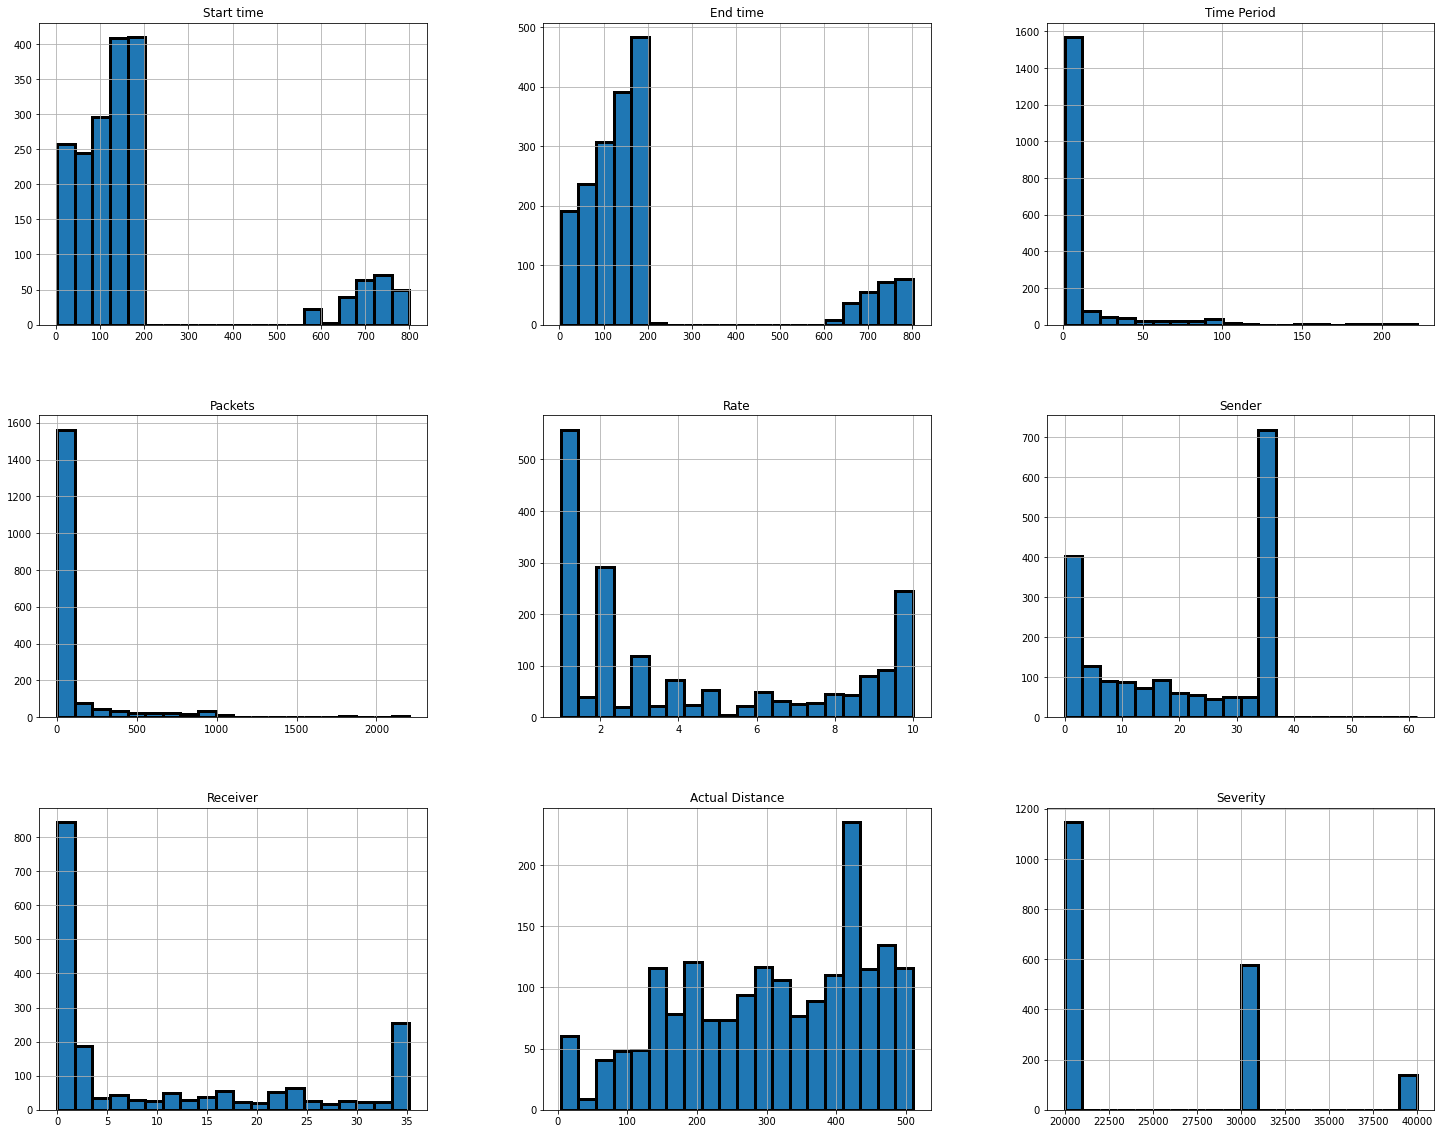

In [9]:
mergedDf.hist(bins=20, figsize=(25,20), edgecolor='black', linewidth=3)
plt.show()

In [10]:

X=mergedDf[['Start time','End time','Time Period','Packets','Rate','Sender','Receiver','Actual Distance']]
Y=mergedDf.Severity
X.head()

,Start time,End time,Time Period,Packets,Rate,Sender,Receiver,Actual Distance
0,3,189,187,1859,9.941176,17.056668,34.451336,355.306833
1,3,189,187,1859,9.941176,19.017631,34.451336,109.731664
2,3,189,187,1859,9.941176,34.874903,34.451336,22.972370
3,3,96,94,936,9.957447,6.678918,32.171998,158.660533
4,3,3,1,3,3.000000,11.836256,0.782531,502.115994


In [86]:
encoder =LabelBinarizer()
minMaxScaler = MinMaxScaler()

Y=encoder.fit_transform(Y)
X=minMaxScaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [87]:
print("X-train:", X_train.shape)
print("y-train:", Y_train.shape)
print("------------------------")
print("X-test:", X_test.shape)
print("y-test:", Y_test.shape)

X-train: (1489, 8)
y-train: (1489, 3)
------------------------
X-test: (373, 8)
y-test: (373, 3)


In [96]:
model = Sequential([
    InputLayer(input_shape=(8,)),
    GRU(64),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)
model.summary()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/muzammil/Python_programs/PycharmProjects/ML/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_31630/1589198796.py", line 1, in <cell line: 1>
    model = Sequential([
  File "/home/muzammil/Python_programs/PycharmProjects/ML/venv/lib/python3.10/site-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
  File "/home/muzammil/Python_programs/PycharmProjects/ML/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
  File "/home/muzammil/Python_programs/PycharmProjects/ML/venv/lib/python3.10/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
ValueError: Input 0 of layer "gru_12" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (No

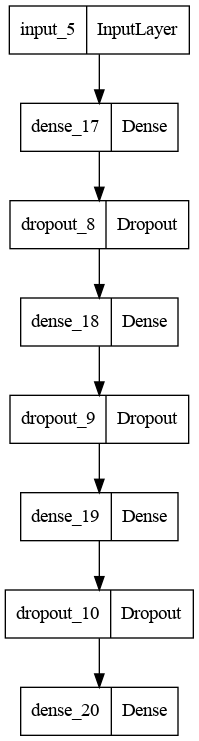

In [89]:
tf.keras.utils.plot_model(model)

In [91]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=1024)

Epoch 1/50
2/2 [==============================] - 0s 83ms/step - loss: 0.2966 - accuracy: 0.8845 - val_loss: 0.2116 - val_accuracy: 0.9169
Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 0.2920 - accuracy: 0.8791 - val_loss: 0.2110 - val_accuracy: 0.9142
Epoch 3/50
2/2 [==============================] - 0s 65ms/step - loss: 0.2857 - accuracy: 0.8825 - val_loss: 0.2181 - val_accuracy: 0.9115
Epoch 4/50
2/2 [==============================] - 0s 63ms/step - loss: 0.2800 - accuracy: 0.8811 - val_loss: 0.2091 - val_accuracy: 0.9196
Epoch 5/50
2/2 [==============================] - 0s 67ms/step - loss: 0.2766 - accuracy: 0.8892 - val_loss: 0.2057 - val_accuracy: 0.9223
Epoch 6/50
2/2 [==============================] - 0s 39ms/step - loss: 0.2753 - accuracy: 0.8899 - val_loss: 0.2123 - val_accuracy: 0.9088
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.2692 - accuracy: 0.8905 - val_loss: 0.2092 - val_accuracy: 0.9035
Epoch 8/50
2/2 [===========

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( )
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9168900804289544

In [19]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
model.score(X_train,Y_train)

1.0

Test Accuracy:  0.9195710455764075


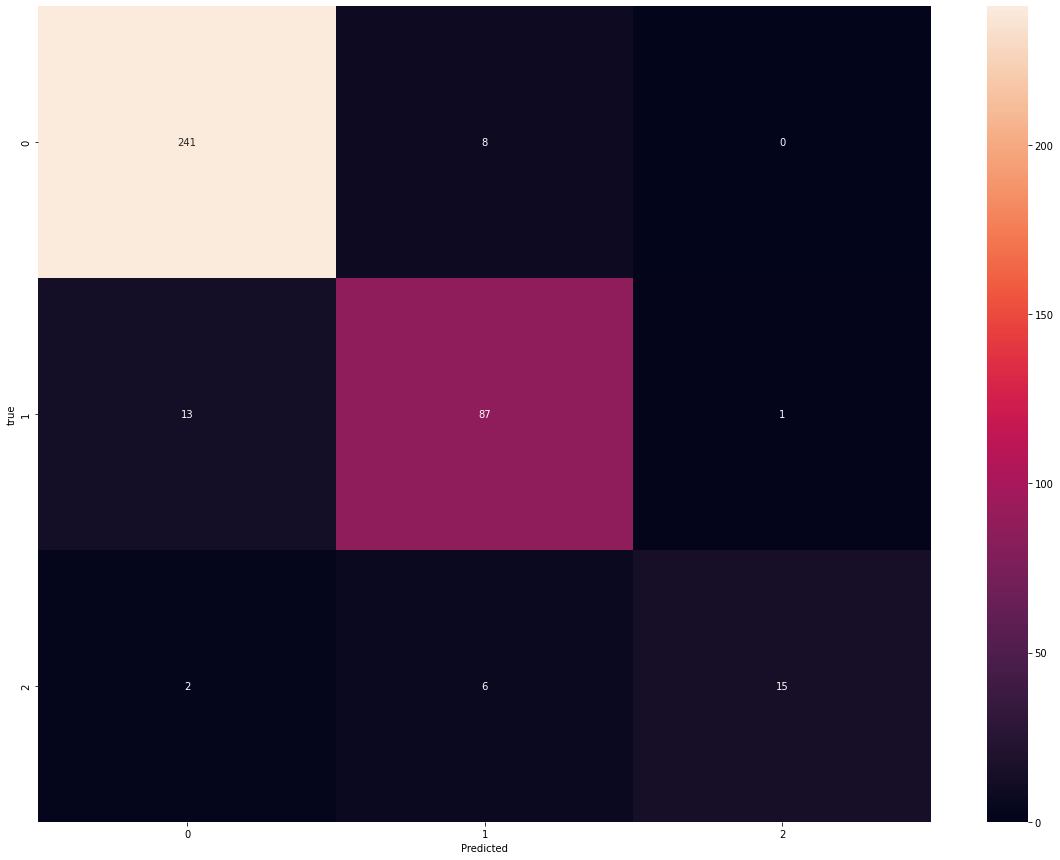

In [21]:
y_pred = model.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [22]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       249
           1       0.86      0.86      0.86       101
           2       0.94      0.65      0.77        23

    accuracy                           0.92       373
   macro avg       0.91      0.83      0.86       373
weighted avg       0.92      0.92      0.92       373



<h1>Hyper-Parameters Tunning</h1>

In [23]:
n_estimators = [100,120,200,1000] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

In [24]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [25]:
rf_random = RandomizedSearchCV(estimator = model,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [26]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 120, 200, 1000]},
                   random_state=35, verbose=2)

In [28]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [100, 120, 200, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': False}  



In [29]:
rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 1, max_features = 'auto', max_depth= 120, bootstrap=False)
rf_model.fit( X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=120, min_samples_split=6)

In [30]:
rf_model.score(X_test,Y_test)

0.9276139410187667

In [11]:
severity_1 = mergedDf[mergedDf['Severity'] == 20000]
severity_2 = mergedDf[mergedDf['Severity'] == 30000]
severity_3 = mergedDf[mergedDf['Severity'] == 40000]

In [12]:
print("20000: ", severity_1.shape)
print("30000: ", severity_2.shape)
print("40000: ", severity_3.shape)

20000:  (1147, 9)
30000:  (576, 9)
40000:  (139, 9)


In [33]:
from sklearn.preprocessing import LabelBinarizer

scaler = MinMaxScaler()
encoder = LabelBinarizer()


def create_feature(data_frame, label, n=7, m=9):
    feature_list = []
    nrow = data_frame.shape[0]
    scale_colums = ['Start time', 'End time', 'Time Period', 'Packets', 'Rate', 'Sender', 'Receiver', 'Actual Distance']
    for col in mergedDf.columns:
        data_frame[col] = data_frame[col].apply(int, 16)
    data_frame[scale_colums] = scaler.fit_transform(data_frame[scale_colums])
    for i in range(0, nrow, n):
        if nrow >= i + n:
            tem_file = data_frame.iloc[i:i + n, :].values
            feature_list.append(tem_file)
    feature_df = pd.DataFrame(data={"features": feature_list, "label": [label] * len(feature_list)})
    return feature_df

In [34]:
severity_1_features = create_feature(severity_1, 20000)
severity_2_features = create_feature(severity_2, 30000)
severity_3_features = create_feature(severity_3, 40000)

/tmp/ipykernel_31630/1401735777.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[col] = data_frame[col].apply(int, 16)
/tmp/ipykernel_31630/1401735777.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[scale_colums] = scaler.fit_transform(data_frame[scale_colums])
/tmp/ipykernel_31630/1401735777.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [35]:
combined_df = pd.concat([severity_1_features, severity_2_features, severity_3_features], ignore_index=True)
combined_df.head()

,features,label
0,"[[0.0, 0.23455233291298866, 1.0, 0.99999999999...",20000
1,"[[0.007566204287515764, 0.007566204287515764, ...",20000
2,"[[0.013871374527112231, 0.013871374527112231, ...",20000
3,"[[0.07313997477931905, 0.07440100882723834, 0....",20000
4,"[[0.12988650693568726, 0.13240857503152587, 0....",20000


In [36]:
transfomed_label = encoder.fit_transform(combined_df.label)

combined_df['features'][0].shape

(7, 9)

In [37]:
n_time_steps = 7
n_features = 9
print((n_features, n_time_steps))

(9, 7)


In [38]:
combined_df.head()

,features,label
0,"[[0.0, 0.23455233291298866, 1.0, 0.99999999999...",20000
1,"[[0.007566204287515764, 0.007566204287515764, ...",20000
2,"[[0.013871374527112231, 0.013871374527112231, ...",20000
3,"[[0.07313997477931905, 0.07440100882723834, 0....",20000
4,"[[0.12988650693568726, 0.13240857503152587, 0....",20000


In [39]:
transfomed_label[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [40]:
features = np.concatenate(combined_df.features.values)
features = features.reshape(-1,n_time_steps,n_features)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(features, transfomed_label, test_size=0.2, random_state=42)
print("X-train:", X_train.shape)
print("y-train:", Y_train.shape)
print("------------------------")
print("X-test:", X_test.shape)
print("y-test:", Y_test.shape)

X-train: (211, 7, 9)
y-train: (211, 3)
------------------------
X-test: (53, 7, 9)
y-test: (53, 3)


In [42]:

model = Sequential([
    # Input((n_time_steps,9)),
    # Conv1D(input_shape=(n_time_steps, n_features), filters=16, kernel_size=3, activation='relu'),
    # Conv1D(input_shape=(n_time_steps, n_features), filters=16, kernel_size=3, activation='relu'),
    #
    # MaxPooling1D(pool_size=16, padding="same"),
    InputLayer(input_shape=(n_time_steps, n_features)),
    GRU(64, return_sequences=True),
    GRU(64),
    #Bidirectional(LSTM(100)),
   # Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(124, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

2022-10-08 11:12:20.650390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-08 11:12:20.650448: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 11:12:20.650475: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (muzammil-Latitude-7480): /proc/driver/nvidia/version does not exist
2022-10-08 11:12:20.650793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7, 64)             14400     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 124)               31868     
                                                                 
 dropout_1 (Dropout)         (None, 124)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 3

In [59]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=1024)

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 1.1091 - categorical_accuracy: 0.3460 - val_loss: 0.9508 - val_categorical_accuracy: 0.6038
Epoch 2/500
1/1 [==============================] - 0s 53ms/step - loss: 0.9689 - categorical_accuracy: 0.5640 - val_loss: 0.8849 - val_categorical_accuracy: 0.6038
Epoch 3/500
1/1 [==============================] - 0s 53ms/step - loss: 0.8975 - categorical_accuracy: 0.6209 - val_loss: 0.8610 - val_categorical_accuracy: 0.6038
Epoch 4/500
1/1 [==============================] - 0s 59ms/step - loss: 0.8679 - categorical_accuracy: 0.6209 - val_loss: 0.8614 - val_categorical_accuracy: 0.6038
Epoch 5/500
1/1 [==============================] - 0s 71ms/step - loss: 0.8836 - categorical_accuracy: 0.6209 - val_loss: 0.8612 - val_categorical_accuracy: 0.6038
Epoch 6/500
1/1 [==============================] - 0s 47ms/step - loss: 0.8840 - categorical_accuracy: 0.6209 - val_loss: 0.8527 - val_categorical_accuracy: 0.6038
Epoch 7/500
1/1 [=

In [40]:
history1 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=1024)

Epoch 1/500
1/1 [==============================] - 0s 105ms/step - loss: 0.9173 - categorical_accuracy: 0.6493 - val_loss: 0.9017 - val_categorical_accuracy: 0.6038
Epoch 2/500
1/1 [==============================] - 0s 44ms/step - loss: 0.8960 - categorical_accuracy: 0.6635 - val_loss: 0.9009 - val_categorical_accuracy: 0.6038
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 0.9094 - categorical_accuracy: 0.6398 - val_loss: 0.8991 - val_categorical_accuracy: 0.6038
Epoch 4/500
1/1 [==============================] - 0s 33ms/step - loss: 1.1623 - categorical_accuracy: 0.6256 - val_loss: 0.8983 - val_categorical_accuracy: 0.6038
Epoch 5/500
1/1 [==============================] - 0s 33ms/step - loss: 0.9252 - categorical_accuracy: 0.6256 - val_loss: 0.8998 - val_categorical_accuracy: 0.6038
Epoch 6/500
1/1 [==============================] - 0s 38ms/step - loss: 0.8996 - categorical_accuracy: 0.6256 - val_loss: 0.9000 - val_categorical_accuracy: 0.6038
Epoch 7/500
1/1

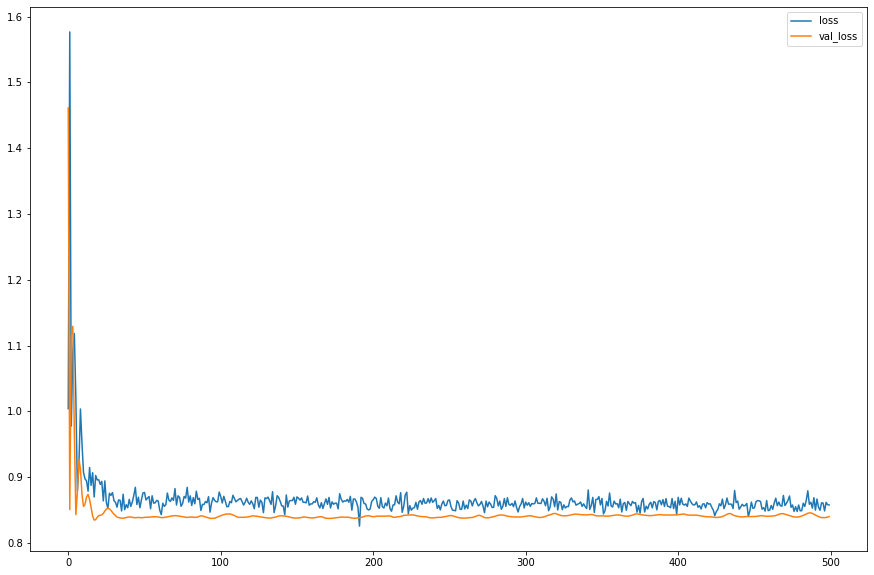

In [51]:
x = list(range(500))
plt.figure(figsize=(15,10))
plt.plot(x, history.history['loss'],label="loss")
plt.plot(x, history.history['val_loss'],label="val_loss")
plt.legend();

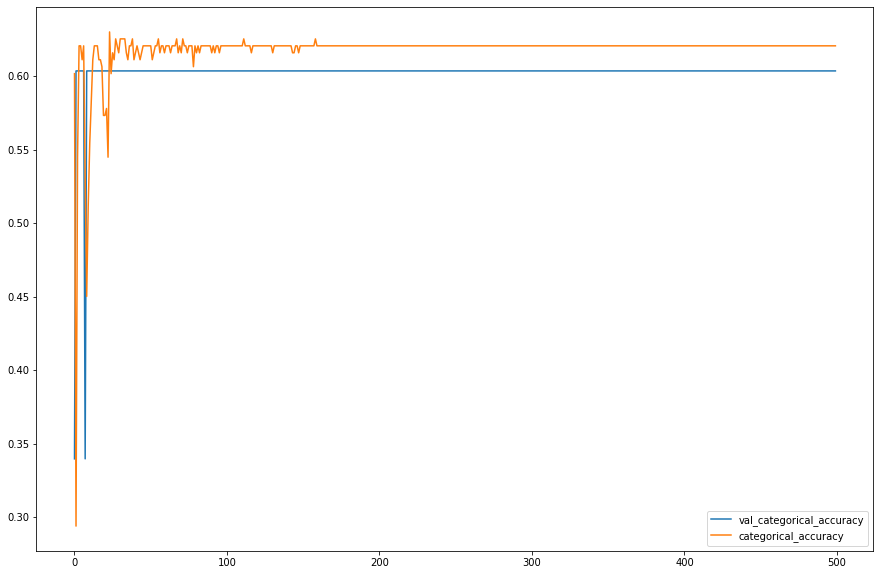

In [52]:
plt.figure(figsize=(15,10))
plt.plot(x, history.history['val_categorical_accuracy'],label="val_categorical_accuracy")
plt.plot(x, history.history['categorical_accuracy'],label="categorical_accuracy")
plt.legend();

In [51]:
import tensorflow_federated as tff

AssertionError: Duplicate registrations for type 'trackable_dict_wrapper'